In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rsi(days):
    df["up_rs"] = df['up'].rolling(days).sum() / days
    df["down_rs"] = df['down'].rolling(days).sum() / days
    df['rs'] = abs(df['up_rs'] / df['down_rs'])
    df['rsi'] = round (100.0 - (100.0 / (1.0 + df['rs'])) , 2)

In [3]:
# import data
df = pd.read_csv("https://webb-site.com/dbpub/pricesCSV.asp?i=5295", index_col = 0, parse_dates = True)
df.head()

,settleDate,susp,closing,bid,ask,low,high,vol,turn,VWAP,adjClose,adjBid,adjAsk,adjLow,adjHigh,adjVol,adjVWAP,totalRet
atDate,,,,,,,,,,,,,,,,,,
2020-09-25,2020-09-29,0,24.06,24.04,24.06,23.90,24.28,77083932,1857078039,24.091636,24.06,24.04,24.06,23.90,24.28,77083932,24.09164,-0.00249
2020-09-24,2020-09-28,0,24.12,24.10,24.12,23.98,24.36,134397017,3243287942,24.132142,24.12,24.10,24.12,23.98,24.36,134397017,24.13214,-0.01631
2020-09-23,2020-09-25,0,24.52,24.50,24.52,24.32,24.58,91849416,2247605196,24.470544,24.52,24.50,24.52,24.32,24.58,91849416,24.47054,0.00082
2020-09-22,2020-09-24,0,24.50,24.48,24.50,24.44,24.68,93247378,2289984230,24.558162,24.50,24.48,24.50,24.44,24.68,93247378,24.55816,-0.00890
2020-09-21,2020-09-23,0,24.72,24.70,24.72,24.70,25.36,124941905,3116916588,24.946927,24.72,24.70,24.72,24.70,25.36,124941905,24.94693,-0.02060


In [4]:
# Parameter
years = 15
days = 30

df = df[::-1]
df = df.iloc[-250 * years:, 10 : 11]
df["% change"] = (df["adjClose"] - df["adjClose"].shift(1)) / df["adjClose"].shift(1)
df["up"] = df['% change'].where(df['% change'] >= 0).fillna(0)
df['down'] = df['% change'].where(df['% change'] < 0).fillna(0)
df.dropna(subset = ['% change'], inplace = True)

# RSI
rsi(days)

# Strategy
Position = []
for x in range(df.shape[0]):
    if (df['rsi'].iloc[x] < 70 and df['rsi'].iloc[x-1] > 70):
        Position.append(0)
    elif (df['rsi'].iloc[x] > 30 and df['rsi'].iloc[x-1] < 30):
        Position.append(1)
    else:
        try:
            Position.append(Position[-1])
        except: Position.append(0)

df['position'] = Position
df["return"] = df["adjClose"].apply(np.log).diff(1)
df["strategy_return"] = df["position"] * df["return"]
df["total_return"] = np.exp(df["strategy_return"].cumsum())
df.tail(20)

,adjClose,% change,up,down,up_rs,down_rs,rs,rsi,position,return,strategy_return,total_return
atDate,,,,,,,,,,,,
2020-08-31,25.84,-0.010720,0.000000,-0.010720,0.004599,-0.004379,1.050206,51.22,0,-0.010778,-0.0,1.828037
2020-09-01,25.88,0.001548,0.001548,0.000000,0.003925,-0.004379,0.896261,47.26,0,0.001547,0.0,1.828037
2020-09-02,25.82,-0.002318,0.000000,-0.002318,0.003925,-0.003695,1.062091,51.51,0,-0.002321,-0.0,1.828037
2020-09-03,25.72,-0.003873,0.000000,-0.003873,0.003639,-0.003825,0.951574,48.76,0,-0.003880,-0.0,1.828037
2020-09-04,25.52,-0.007776,0.000000,-0.007776,0.003639,-0.003389,1.073940,51.78,0,-0.007806,-0.0,1.828037
2020-09-07,25.44,-0.003135,0.000000,-0.003135,0.003639,-0.003493,1.041816,51.02,0,-0.003140,-0.0,1.828037
2020-09-08,25.38,-0.002358,0.000000,-0.002358,0.003508,-0.003572,0.982088,49.55,0,-0.002361,-0.0,1.828037
2020-09-09,25.24,-0.005516,0.000000,-0.005516,0.003429,-0.003756,0.913093,47.73,0,-0.005531,-0.0,1.828037
2020-09-10,25.14,-0.003962,0.000000,-0.003962,0.003429,-0.003653,0.938851,48.42,0,-0.003970,-0.0,1.828037


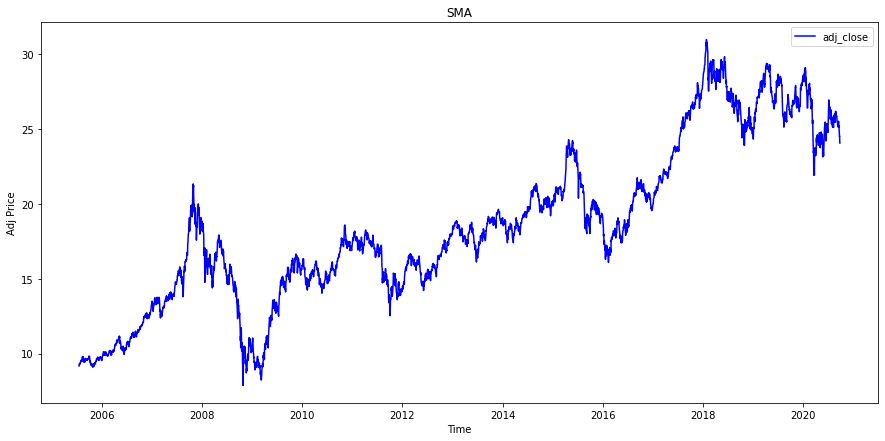

In [5]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(df.index, df['adjClose'], c = 'b', label = "adj_close")
ax.set(xlabel='Time', ylabel='Adj Price', title='SMA')

plt.legend()

[Text(0, 0.5, 'RSI'), Text(0.5, 1.0, 'RSI')]

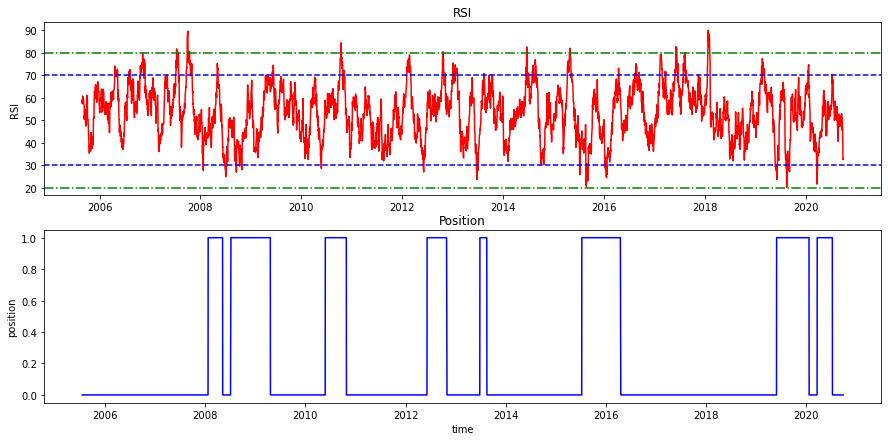

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,7))
ax2.plot(df.index, df['position'], c = 'b')
ax2.set(xlabel = 'time', ylabel = 'position', title = "Position")

ax1.plot(df.index, df["rsi"] , c = "r")
ax1.axhline(y= 30, c = 'b', linestyle = '--' )
ax1.axhline(y= 70, c = 'b', linestyle = '--' )
ax1.axhline(y= 20, c = 'g', linestyle = '-.' )
ax1.axhline(y= 80, c = 'g', linestyle = '-.' )
ax1.set(ylabel='RSI', title='RSI')

Total return of the strategy is:83.0%


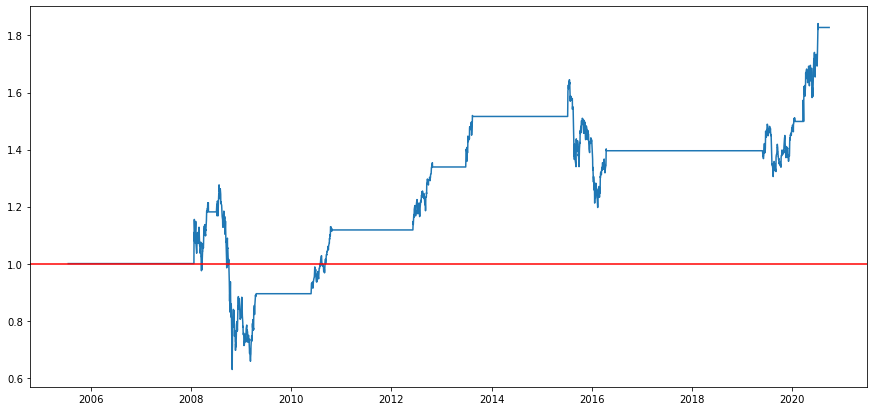

In [8]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(df.index, df["total_return"])
ax.axhline(y = 1, c = 'r')
print ("Total return of the strategy is:" + str(((round(df.iloc[-1,-1],2)) - 1) * 100) + '%')